In [1]:
print("hello world")

hello world


In [3]:
import pandas as pd
from textblob import TextBlob



In [15]:
df=pd.read_csv("D:\Coding\Projects\Fsp Quickbazar\Datasets\quickbazaar_orders.csv")
df["Feedback2"]=df["Feedback"].astype(str)



<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\admin\AppData\Local\Temp\ipykernel_7520\451146624.py:1: SyntaxWarning: invalid escape sequence '\C'
  df=pd.read_csv("D:\Coding\Projects\Fsp Quickbazar\Datasets\quickbazaar_orders.csv")


In [18]:



def polarity_to_score(p):
   
    return round(((p + 1) / 2) * 9 + 1)  
    # Explanation:
    # -1 → 1
    #  0 → 5.5
    # +1 → 10


sentiment_scores = []
for text in df["Feedback2"]:
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # -1 to +1
    score = polarity_to_score(polarity)
    sentiment_scores.append(score)

# Add new column
df["sentiment_score"] = sentiment_scores

# Save file
df.to_csv(r"D:\Coding\Projects\Fsp Quickbazar\Datasets\quickbazaar_orders_sentiment_textblob.csv", index=False)

print("DONE! Sentiment added using TextBlob.")


DONE! Sentiment added using TextBlob.


SyntaxError: invalid syntax (2621292756.py, line 1)

In [26]:
text= " ".join(df["Feedback"].astype(str).tolist())

blob=TextBlob(text)

words=blob.words.lower()

words_freq=pd.Series(words).value_counts()

words_freq.head(20)

delivery      185
experience    164
very          143
service       138
quality       137
app           126
was           109
user           96
friendly       96
discounts      83
loved          83
the            83
neutral        78
fast           76
acceptable     76
product        76
average        75
okay           71
nothing        70
special        70
Name: count, dtype: int64

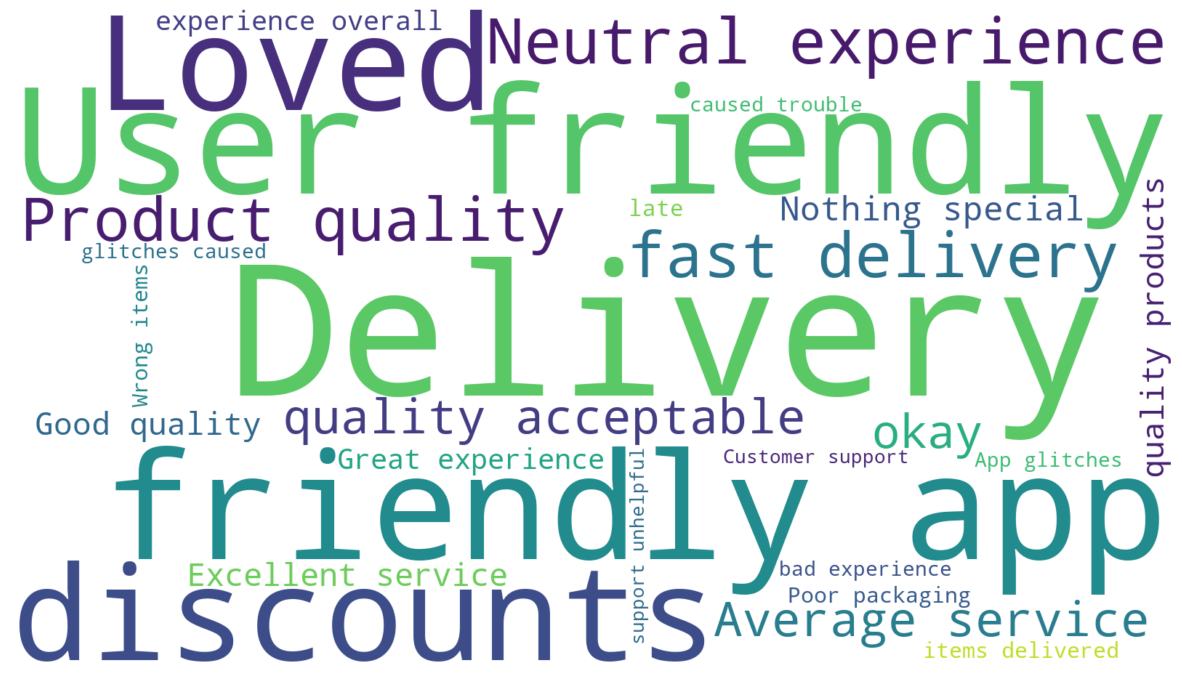

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width=1600, height=900, background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()